In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv("gurgaon_properties_outlier_treated.csv")

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3.0,3.0,3,1.0,South,Moderately Old,NaN,2250.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,30.0,750.000000
1,flat,la vida by tata housing,sector 113,2.78,10335.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.00,2170.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,896.666667
2,house,dlf city plots phase 3,sector 24,1.44,2963.0,4860.0,Plot area 60(50.17 sq.m.),4.0,2.0,2,1.0,NaN,Old Property,NaN,540.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1215.000000
3,house,independent,sector 4,0.65,10317.0,630.0,Plot area 70(6.5 sq.m.),1.0,1.0,1,1.0,South-East,Moderately Old,NaN,70.00,NaN,0.0,0.0,0.0,0.0,1.0,0.0,21.0,630.000000
4,flat,experion windchants,sector 112,3.29,11742.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3.0,3.0,3+,2.0,South,Relatively New,2802.0,2225.56,NaN,1.0,0.0,0.0,0.0,0.0,2.0,192.0,934.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### built_up_area            

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

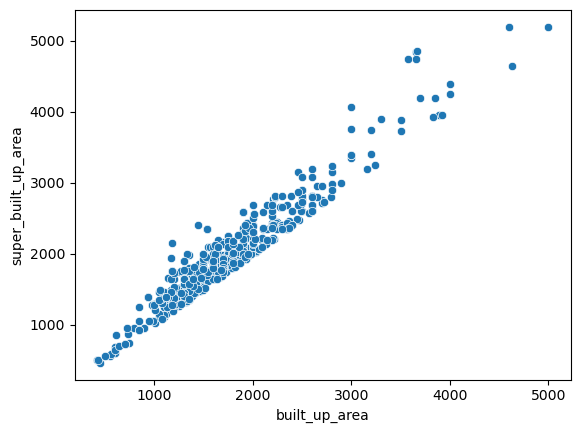

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

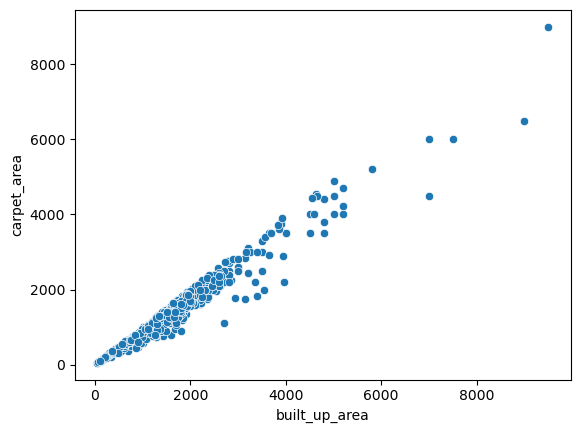

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [12]:
((df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [15]:
all_present_df=df[~((df['super_built_up_area'].isnull())|(df['built_up_area'].isnull())|(df['carpet_area'].isnull()))]

In [16]:
all_present_df.shape

(531, 24)

In [17]:
super_to_built_up_ratio=(all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [18]:
carpet_to_built_up_area=(all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [19]:
print(super_to_built_up_ratio,carpet_to_built_up_area)

1.105263157894737 0.9


In [20]:
# both area present but built up null

sbc_df= df[~(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&~(df['carpet_area'].isnull())]

In [21]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
22,flat,ireo victory valley,sector 67,2.95,12236.0,2411.0,Super Built up area 2411(223.99 sq.m.)Carpet a...,3.0,3.0,3,10.0,North-West,Relatively New,2411.0,NaN,1906.0,1.0,0.0,0.0,0.0,0.0,2.0,228.0,803.666667
29,flat,elan the presidential,sector 106,6.30,15385.0,4095.0,Super Built up area 4095(380.44 sq.m.)Carpet a...,5.0,6.0,3+,10.0,North-East,Under Construction,4095.0,NaN,3500.0,0.0,0.0,0.0,0.0,0.0,2.0,102.0,819.000000
33,flat,pivotal devaan,sector 84,0.35,7277.0,481.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2.0,2.0,1,10.0,West,Relatively New,583.0,NaN,481.0,0.0,0.0,0.0,1.0,0.0,0.0,123.0,240.500000
35,flat,indiabulls centrum park,sector 103,2.14,7443.0,2875.0,Super Built up area 2875(267.1 sq.m.)Carpet ar...,4.0,6.0,3+,7.0,East,Relatively New,2875.0,NaN,2550.0,1.0,0.0,0.0,0.0,0.0,0.0,190.0,718.750000
40,flat,shree vardhman victoria,sector 70,1.63,8359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,3.0,3,5.0,East,New Property,1950.0,NaN,1161.0,1.0,0.0,0.0,0.0,1.0,0.0,56.0,650.000000


In [22]:
sbc_df.shape

(421, 24)

In [23]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] /1.105263157894737)+ (sbc_df['carpet_area'] /0.9))/2),inplace=True) 

C:\Users\sk531\AppData\Local\Temp\ipykernel_30536\1777072953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] /1.105263157894737)+ (sbc_df['carpet_area'] /0.9))/2),inplace=True)


In [24]:
df.update(sbc_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
# super_built not null and (c and builtup null)
 
sb_df=df[~(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())& (df['carpet_area'].isnull())]

In [28]:
sb_df.shape

(875, 24)

In [29]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105263157894737),inplace=True)

C:\Users\sk531\AppData\Local\Temp\ipykernel_30536\894175848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105263157894737),inplace=True)


In [30]:
df.update(sb_df)

In [32]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [33]:
# carpet not null and (super built and builtup null)
 
c_df=df[(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())& ~(df['carpet_area'].isnull())]

In [34]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
9,flat,apartment,sector 92,0.75,4688.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3.0,4.0,3,2.0,East,Moderately Old,NaN,NaN,1600.0,0.0,1.0,0.0,0.0,0.0,0.0,146.0,533.333333
11,flat,bestech park view residency,sector 2,0.56,8629.0,649.0,Carpet area: 651 (60.48 sq.m.),1.0,1.0,2,6.0,South,Moderately Old,NaN,NaN,651.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,649.000000
14,flat,maruti vihar colony,sector 28,0.95,8887.0,1069.0,Carpet area: 1069 (99.31 sq.m.),2.0,1.0,1,1.0,NaN,Old Property,NaN,NaN,1069.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,534.500000
15,flat,kendriya vihar,sector 56,0.47,7769.0,605.0,Carpet area: 605 (56.21 sq.m.),1.0,1.0,1,3.0,NaN,Old Property,NaN,NaN,605.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0,605.000000
17,flat,adani brahma samsara vilasa,sector 63,4.49,14254.0,3150.0,Carpet area: 350 (292.64 sq.m.),4.0,4.0,3+,3.0,North,New Property,NaN,NaN,350.0,0.0,0.0,0.0,0.0,0.0,2.0,131.0,787.500000


In [35]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\sk531\AppData\Local\Temp\ipykernel_30536\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [36]:
c_df.shape

(672, 24)

In [37]:
df.update(c_df)

In [39]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

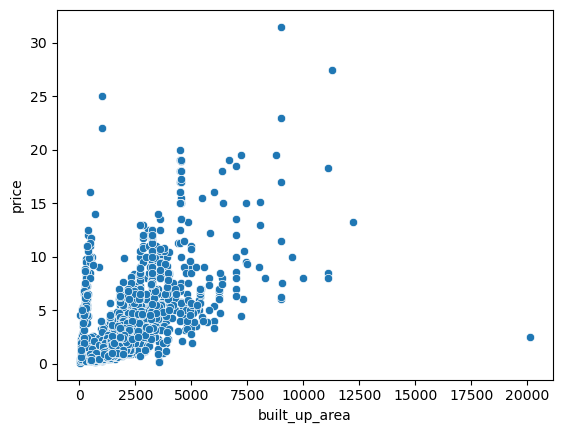

In [40]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

# we can see anomly that area very less but price are very high 


In [41]:
anamoly_df=df[(df['built_up_area']<2000)& (df['price']>2.5)][['price','area','built_up_area']]

In [42]:
anamoly_df.sample(5)

,price,area,built_up_area
1623,3.25,1512.0,1512.0
24,10.00,4950.0,550.0
937,22.00,8250.0,1000.0
2616,2.51,2061.0,1865.0
1175,4.45,1265.0,150.0


In [43]:
anamoly_df['built_up_area']=anamoly_df['area']

In [44]:
anamoly_df.sample(5)

,price,area,built_up_area
1612,2.60,1080.0,1080.0
2763,3.30,1728.0,1728.0
3410,6.30,1800.0,1800.0
613,3.87,2250.0,2250.0
2568,5.30,1935.0,1935.0


In [45]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

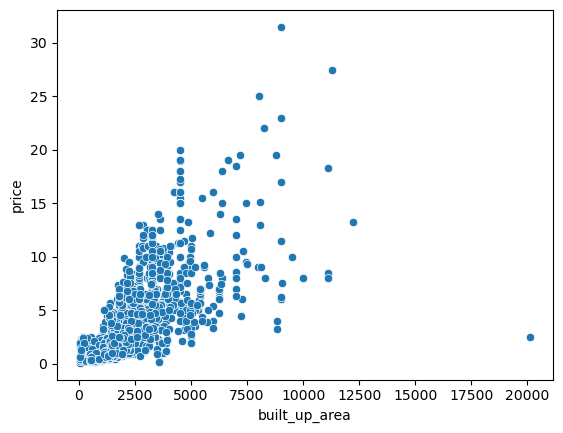

In [46]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])


In [ ]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [51]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 14,5.00,22222.0,3.0,3.0,3,1.0,South,Moderately Old,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,30.0
1,flat,la vida by tata housing,sector 113,2.78,10335.0,3.0,4.0,3+,5.0,North-East,Relatively New,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,220.0
2,house,dlf city plots phase 3,sector 24,1.44,2963.0,4.0,2.0,2,1.0,NaN,Old Property,540.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,house,independent,sector 4,0.65,10317.0,1.0,1.0,1,1.0,South-East,Moderately Old,70.00,0.0,0.0,0.0,0.0,1.0,0.0,21.0
4,flat,experion windchants,sector 112,3.29,11742.0,3.0,3.0,3+,2.0,South,Relatively New,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,192.0


In [53]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 14,5.00,22222.0,3.0,3.0,3,1.0,South,Moderately Old,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,30.0
1,flat,la vida by tata housing,sector 113,2.78,10335.0,3.0,4.0,3+,5.0,North-East,Relatively New,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,220.0
2,house,dlf city plots phase 3,sector 24,1.44,2963.0,4.0,2.0,2,1.0,NaN,Old Property,540.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,house,independent,sector 4,0.65,10317.0,1.0,1.0,1,1.0,South-East,Moderately Old,70.00,0.0,0.0,0.0,0.0,1.0,0.0,21.0
4,flat,experion windchants,sector 112,3.29,11742.0,3.0,3.0,3+,2.0,South,Relatively New,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,192.0


In [54]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
servant room          0
study room            0
pooja room            0
store room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [57]:
df[df['floorNum'].isnull()] 

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
76,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
459,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
462,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
865,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1107,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1114,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1232,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1272,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1927,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0


In [58]:
df[df['property_type']=='house']['floorNum'].median()

2.0

In [59]:
df['floorNum'].fillna(2.0,inplace=True)

In [60]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
servant room          0
study room            0
pooja room            0
store room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### facing

(3555, 19)

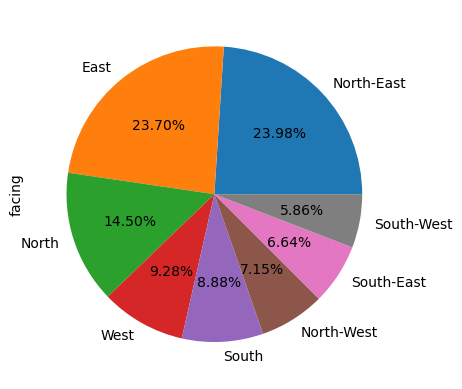

In [62]:
df['facing'].value_counts().plot(kind='pie',autopct="%0.2f%%")
# only option is to drop this column as we cant predict 1/4 of total values 
df.shape

In [63]:
df.drop(columns=['facing'],inplace=True)

In [64]:
df.sample()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
2048,flat,ss the leaf,sector 85,1.05,6402.0,2.0,2.0,3,11.0,Relatively New,1484.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [65]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
pooja room         0
store room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [67]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
462,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df.drop(index=[462],inplace=True)

In [69]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
pooja room         0
store room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

###

In [70]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'servant room', 'study room', 'pooja room',
       'store room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

### agePossession

In [71]:
df['agePossession'].value_counts()

Relatively New        1605
New Property           612
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     208
Name: agePossession, dtype: int64

In [72]:
df[df['agePossession']=='Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
5,house,independent,sector 4,0.85,7522.0,3.0,3.0,0,1.0,Undefined,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,house,independent,sector 4,1.10,11111.0,3.0,4.0,1,2.0,Undefined,990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,flat,ramsons kshitij,sector 95,0.35,5495.0,2.0,2.0,0,5.0,Undefined,637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,flat,shapoorji pallonji joyville gurugram,sector 102,0.95,10383.0,2.0,2.0,2,14.0,Undefined,915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,flat,signature global city,sector 37d,1.10,9839.0,2.0,2.0,2,4.0,Undefined,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,flat,sare green parc,sector 92,0.75,4820.0,3.0,2.0,2,16.0,Undefined,1556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3481,flat,rof aalayas,sector 102,0.45,6000.0,1.0,1.0,2,6.0,Undefined,750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3504,flat,raheja vedaanta,sector 108,0.70,4651.0,2.0,2.0,2,12.0,Undefined,1505.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3526,flat,dlf the arbour,sector 63,7.80,19747.0,4.0,4.0,0,6.0,Undefined,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0


In [75]:
def mode_based_imputation(row):
    if row['agePossession']=='Undefined':
        mode_value= df[(df['sector']==row['sector'])&(df['property_type']==row['property_type'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']


In [76]:
df['agePossession']=df.apply(mode_based_imputation,axis=1)

In [77]:
df['agePossession'].value_counts()

Relatively New        1716
New Property           661
Moderately Old         584
Old Property           326
Under Construction     214
Undefined               53
Name: agePossession, dtype: int64

In [79]:
def mode_based_imputation2(row):
    if row['agePossession']=='Undefined':
        mode_value= df[(df['sector']==row['sector']) ]['agePossession'].mode()      
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']


In [80]:
df['agePossession']=df.apply(mode_based_imputation2,axis=1)

In [81]:
df['agePossession'].value_counts()

Relatively New        1725
New Property           662
Moderately Old         591
Old Property           329
Under Construction     214
Undefined               33
Name: agePossession, dtype: int64

In [82]:
def mode_based_imputation3(row):
    if row['agePossession']=='Undefined':
        mode_value= df[(df['property_type']==row['property_type']) ]['agePossession'].mode()      
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']


In [83]:
df['agePossession']=df.apply(mode_based_imputation3,axis=1)

In [84]:
df['agePossession'].value_counts()

Relatively New        1727
New Property           662
Moderately Old         622
Old Property           329
Under Construction     214
Name: agePossession, dtype: int64

In [85]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
pooja room         0
store room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [86]:
df.to_csv("gurgaon_properties_missing_value_imputation.csv",index=False)

In [87]:
df.shape

(3554, 18)